In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
df = pd.read_csv('../../Results/Layer_Boundaries/PlanB/Test/SLD_0000733.vsi - 20x_01 Detections.txt', sep='	|\t', engine='python')

In [3]:
df.head()

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5843.9,2882.9,404.7247,94.8008,0.5659,...,267.5440,9521.9971,32,624.8047,508.6877,996.4651,819.0421,283.4010,168.2905,0.0
1,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5162.3,3023.6,386.1700,92.7241,0.5644,...,267.5441,9522.0020,30,1233.2239,349.5090,851.8026,638.2498,191.4112,831.1013,0.0
2,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5996.1,2807.0,358.5164,90.6484,0.5483,...,267.5440,9521.9980,37,550.5585,483.9357,1003.8986,837.7945,328.6314,138.0601,0.0
3,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5755.2,2874.7,346.9046,98.2593,0.4515,...,267.5441,9522.0020,34,706.4868,467.4880,950.9117,769.6846,233.6992,252.4514,0.0
4,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,6061.4,2780.0,342.8348,89.9551,0.5324,...,267.5441,9522.0000,33,527.3497,488.2429,1004.1270,842.5746,330.1198,126.8676,0.0


In [4]:
cell_df = df[["Class", 'Centroid X µm', 'Centroid Y µm']]

In [5]:
cell_df.head()

,Class,Centroid X µm,Centroid Y µm
0,Layer 5,5843.9,2882.9
1,Layer 5,5162.3,3023.6
2,Layer 5,5996.1,2807.0
3,Layer 5,5755.2,2874.7
4,Layer 5,6061.4,2780.0


In [6]:
from scipy.spatial.distance import cdist
def closest_node(node, nodes):
    return cdist([node], nodes).argmin()

In [7]:
def neigboor_nodes(node, nodes):
    x_mask = np.logical_and(nodes[0] > (node[0] - 10), nodes[0] < (node[0] + 10))
    #y_mask = np.logical_and(nodes[1] > (node[1] - 10), nodes[1] < (node[1] + 10))
    #print(y_mask.shape)
    #mask = np.logical_and(x_mask, y_mask)
    #print(mask.shape)
    #return nodes[mask]
    print (x_mask.shape)

In [8]:
Xs = cell_df['Centroid X µm'].to_numpy(dtype=float)
Ys = cell_df['Centroid Y µm'].to_numpy(dtype=float)
points = np.column_stack((Xs, Ys))

In [9]:
borders_cells = []
for index, row in cell_df.iterrows():
    current_x = row['Centroid X µm']
    current_y = row['Centroid Y µm']
    current_class = row['Class']
    #dfy = cell_df.iloc[(cell_df['Centroid Y µm']-current_y).abs().argsort()[:2]]
    dfy = cell_df[abs(cell_df['Centroid Y µm']-current_y) < 20]
    df = dfy[abs(dfy['Centroid X µm']-current_x) < 20]
    

    #print("--------------------------------------")
    #print(current_class, current_x, current_y)
    #print(df)
    #print(df[df['Class'] != current_class])
    
    if df[df['Class'] != current_class].size > 0:
        borders_cells.append([row['Centroid X µm'], row['Centroid Y µm']])
        #print('Add to border cell')
    #print("--------------------------------------")
        
    

    

In [10]:
borders_cells = np.array(borders_cells)

In [11]:
borders_cells.shape

(1142, 2)

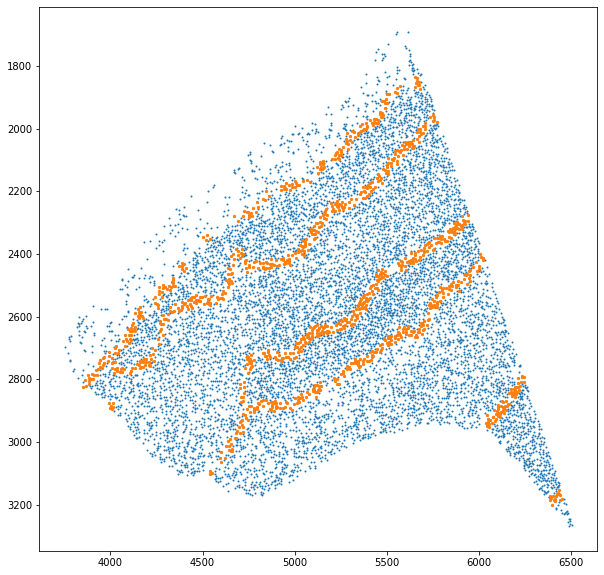

In [12]:
plt.figure(figsize=[10,10])
plt.scatter(points[:,0], points[:,1], s=1)
plt.scatter(borders_cells[:,0], borders_cells[:,1], s=5)
plt.gca().invert_yaxis()

In [13]:
!pwd

/home/jacquemi/working_dir/Rat_sscx_nissl/rat_sscx_nissl_analysis/Notebooks
